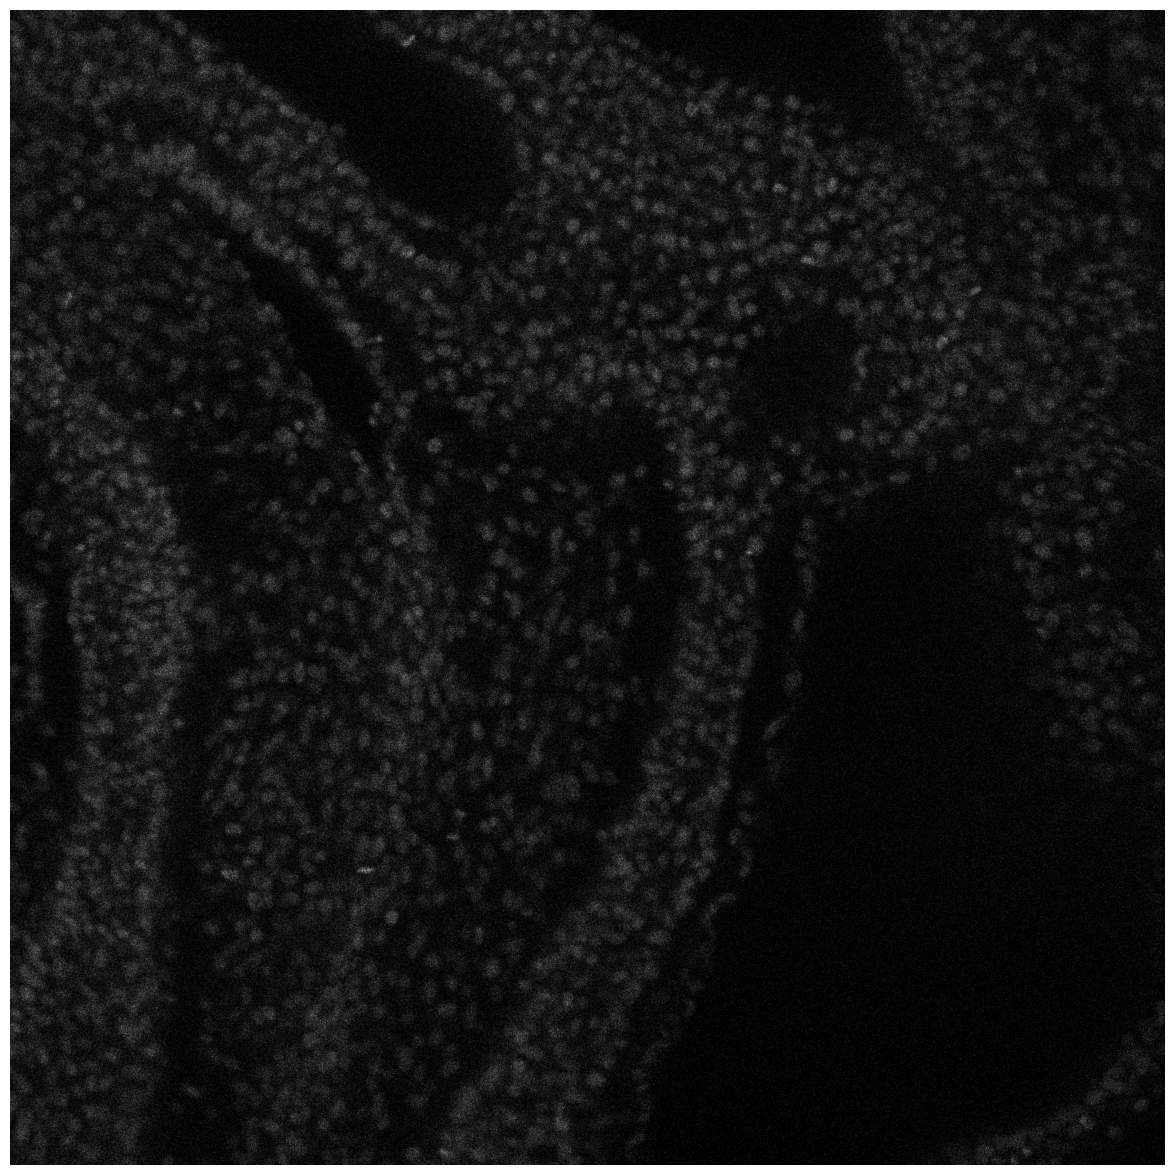

In [2]:
from src.ssunet.models import Bit2Bit
from src.ssunet.configs import MasterConfig
from tifffile import imread
from src.tools.tools import imshow

root_dir = "models/20241101_213102_e=150_p=32/test_600x32x256x256_skip=1_l=10_d=4_sf=32_ds=2at10_f=10.0_z=3_g=8_sd=0_b=tri_a=gelu"
config_path = root_dir + "/config.yml"
model_path = root_dir + "/model.ckpt"

config = MasterConfig.from_config(config_path)
model = Bit2Bit.load_from_checkpoint(model_path)
input = imread(config.data_path)
imshow(input[100])

Inference #: 100%|██████████| 23/23 [00:08<00:00,  2.63it/s, vram_usage=18.7 GB]


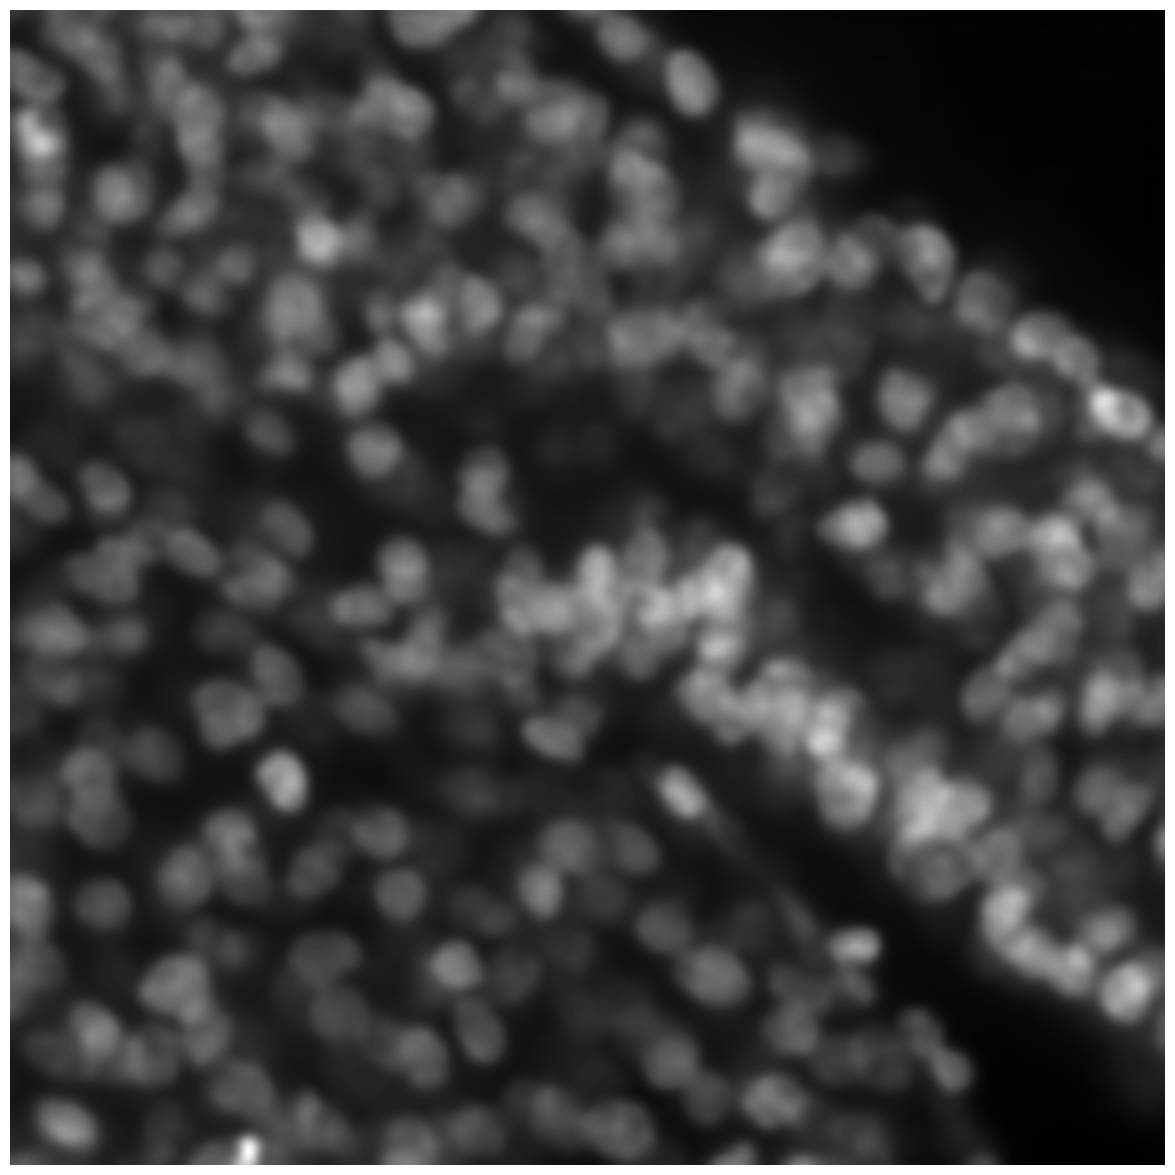

In [4]:
from src.tools.gpuinference import gpu_patch_inference
from tifffile import imwrite

# GPU inference with z-patches
output = gpu_patch_inference(
    model,
    input[:, :512, : 512],
    min_overlap=16,
    initial_patch_depth=32,
    device=config.device,
)

imshow(output[100])
imwrite(root_dir + "/input_512_corner.tif", input)
imwrite(root_dir + "/inference_512_corner.tif", output)

In [5]:
from src.tools.gpuinference import grid_inference

output = grid_inference(input, model, device=config.device, split=5, initial_patch_depth=64)

Grid inference: 100%|██████████| 25/25 [03:05<00:00,  7.42s/it]


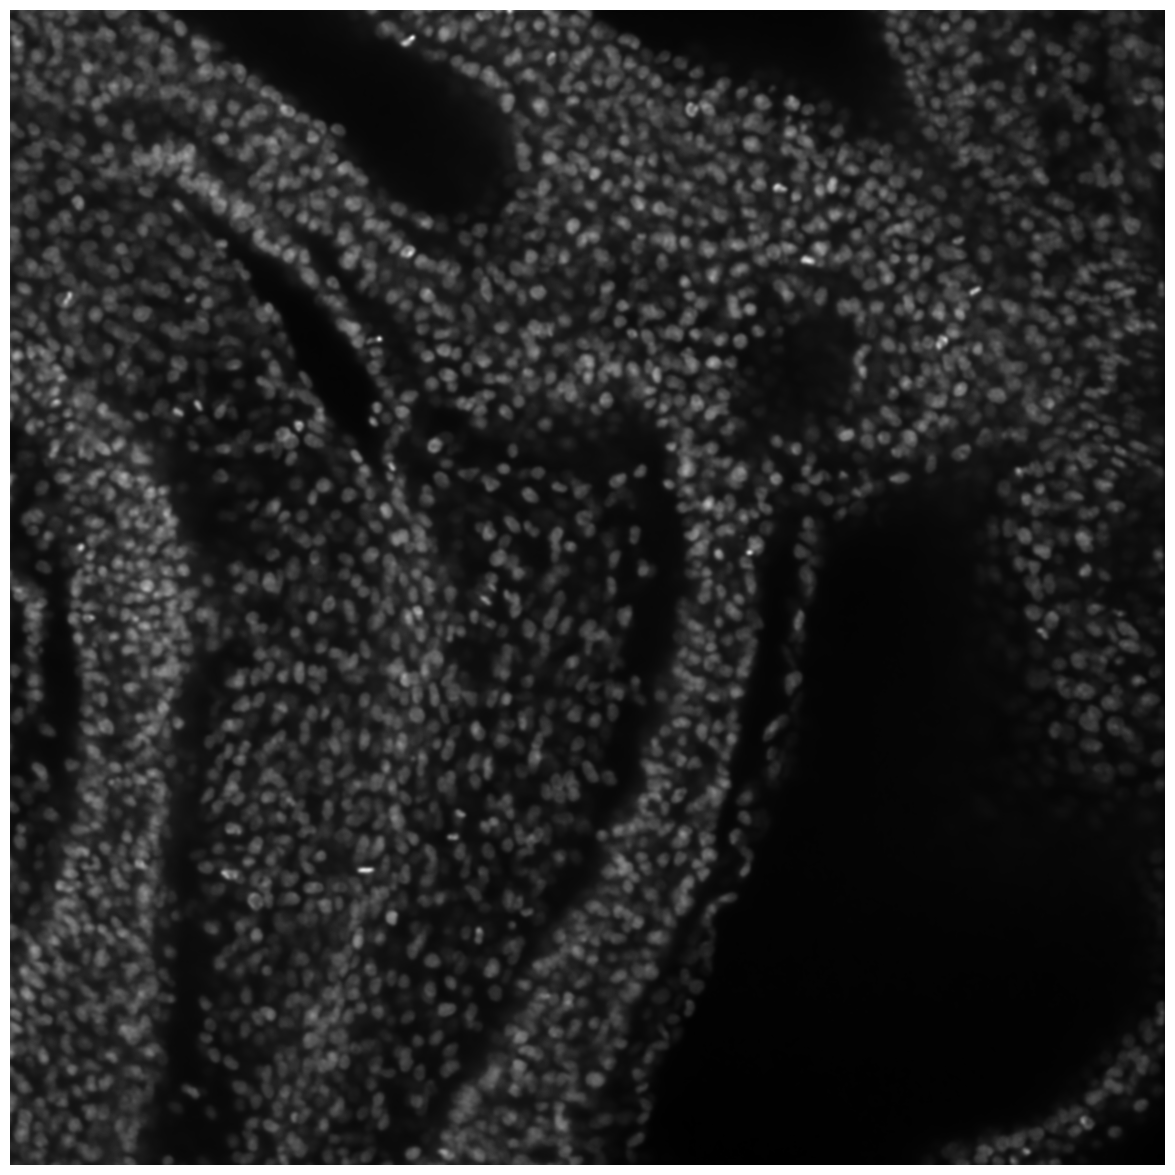

In [6]:
imshow(output[100])